<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter5_3_2_Introduction_to_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Natural Language Processing 🌐🗣️  

Tụi mình sẽ tìm hiểu về chủ đề **NLP** (xử lý ngôn ngữ tự nhiên) - một trong những nhánh thú vị của trí tuệ nhân tạo nha. 🤖✨  

![Introduce image](https://bobcares.com/wp-content/uploads/2024/11/Natural-Language-Processing.png)


## Getting Text from CSV Files 📄  

Bây giờ tụi mình sẽ làm việc với dữ liệu text lấy từ file CSV nha.  

Ở đây, tác giả nói đã sử dụng bộ dữ liệu từ kho dữ liệu **Twitter**, áp dụng trong open-source **Sentiment Analysis in Text dataset**. Tuy nhiên, lại không rõ về đường dẫn hay vị trí lấy cụ thể. 🤔  

Do đó, mình xin phép sử dụng một bộ dữ liệu tương tự để thay thế nha.  

Mọi người tải giúp mình bộ dữ liệu **tweet_emotions** [tại đây](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text?select=tweet_emotions.csv) nha. Sau đó, úp lên phần cửa sổ thư mục bên tay trái. 📥  


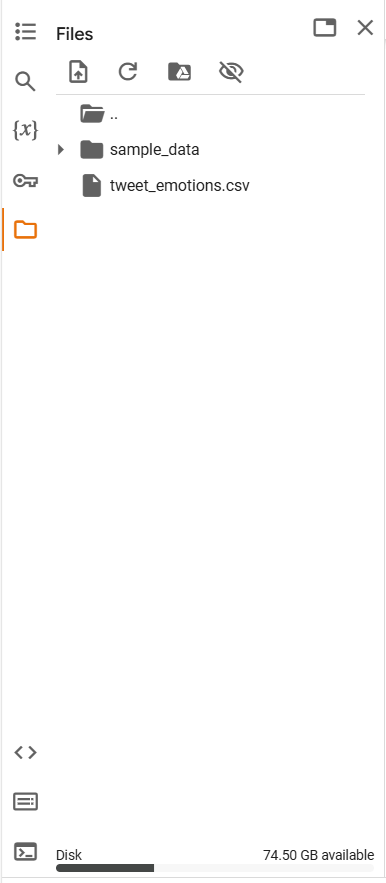

Truy cập vào đường dẫn về bộ dữ liệu trên, xuống phần phân tích dữ liệu, mọi người có thể thấy chúng bao gồm 3 cột lần lượt là **id, sentiment và content**. 📊  

Ở đây, mọi người có thể load nhanh file bằng **Pandas** cũng được nha. 🐼  
Hiện tại, mình thực hiện theo đúng nguyên tác của tác giả là dùng **reader**. 📖  


In [6]:
import csv
rows = []
# Lưu các hàng của dữ liệu lại
with open("/content/tweet_emotions.csv", encoding="UTF-8") as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  for row in reader:
    rows.append(row)


In [7]:
# Xem cấu trúc 5 hàng đầu tiên của file
for r in rows[:5]:
  print(r)

['tweet_id', 'sentiment', 'content']
['1956967341', 'empty', '@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[']
['1956967666', 'sadness', 'Layin n bed with a headache  ughhhh...waitin on your call...']
['1956967696', 'sadness', 'Funeral ceremony...gloomy friday...']
['1956967789', 'enthusiasm', 'wants to hang out with friends SOON!']


Vậy là dữ liệu mỗi hàng sẽ tương ứng với 3 cột theo thứ tự lần lượt là **id, sentiment và content**. 🗂️  
Hàng đầu tiên chính là tên các cột.  

Bây giờ, tụi mình chỉ việc lọc ra phần **văn bản nội dung** và **nhãn cảm xúc**, đồng thời thực hiện luôn phần **làm sạch văn bản** nha. 🧹  


In [8]:
import nltk
from nltk.corpus import stopwords

# Chuẩn bị trước cho phần loại bỏ từ dừng
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Chuẩn bị trước cho phần loại bỏ thẻ HTML
from bs4 import BeautifulSoup

# Chuẩn bị trước cho phần loại bỏ kí tự đặc biệt
import string
table = str.maketrans('', '', string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
sentences = []
labels = []
for r in rows[1:]: # Vì hàng đầu tiên là tên các cột nên chúng ta không lấy, tính từ vị trí index 1 nha
  labels.append(r[1])
  sentence = r[2].lower()
  # Tiến hành tiền xử lý các kí tự đặc biệt
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("'", " ' ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace(".", " . ")
  # Tiến hành loại bỏ các thẻ HTML bằng BeautifulSoup
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  # Chia thanh danh sách các từ
  words = sentence.split()
  filtered_sentence = ""
  # Tiến hành loại bỏ kí tự đặc biệt và kiểm tra để loại bỏ các từ dừng
  for word in words:
    word = word.translate(table) # Loại bỏ kí tự đặc biệt
    if word not in stopwords: # Kiểm tra và loại bỏ từ dừng
      filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)

<ipython-input-9-f3571deda936>:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [10]:
# Kiểm tra 5 câu đầu tiên và nhãn của chúng
for i in range(5):
  print(f"Emotion: {labels[i]}")
  print(f"Sentence: {sentences[i]}")
  print("-"*100)

Emotion: empty
Sentence: tiffanylue know listenin bad habit earlier started freakin part  
----------------------------------------------------------------------------------------------------
Emotion: sadness
Sentence: layin n bed headache ughhhh    waitin call    
----------------------------------------------------------------------------------------------------
Emotion: sadness
Sentence: funeral ceremony    gloomy friday    
----------------------------------------------------------------------------------------------------
Emotion: enthusiasm
Sentence: wants hang friends soon 
----------------------------------------------------------------------------------------------------
Emotion: neutral
Sentence: dannycastillo want trade someone houston tickets one  
----------------------------------------------------------------------------------------------------


Bây giờ tụi mình sẽ tiến hành chia tập **huấn luyện** và **kiểm tra** cho bộ dữ liệu nha. 🔄  

Ở đây, mình không chỉ định cứng giống với tác giả vì bộ dữ liệu là khác nhau. Thay vào đó, mình sẽ sử dụng **train_test_split** trong **sklearn** cho nhanh nha. 🐍  

**Code gốc của tác giả** cho bạn nào cần:  

```python
training_size = 28000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chia bộ dữ luyện huấn luyện và kiểm tra với test size là 20%
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2)

In [12]:
# Kiểm tra lại tập huấn luyện và kiểm tra:
print(f"Tổng số câu huấn luyện: {len(training_sentences)}")
print(f"Tổng số câu kiểm tra: {len(testing_sentences)}")

Tổng số câu huấn luyện: 32000
Tổng số câu kiểm tra: 8000


Bây giờ tụi mình sẽ tiến hành áp dụng hết kiến thức **mã hóa** đã học ở phần trước vào nha.

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 20000 # Kích thước tối đa của từ điển
max_length = 10 # Số từ tối đa của chuỗi
trunc_type = 'post' # Phương thức cắt chuỗi là giữ lại các từ phía trước
padding_type = 'post' # Định nghĩa thêm phần đệm vào phía sau chuỗi
oov_tok = "<OOV>" # Token đại diện cho các từ không có trong từ điển

# Tạo bộ mã hóa
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Kiểm tra bộ từ điển mã hóa
print("Bộ từ điển mã hóa: ", tokenizer.word_index)

Bộ từ điển mã hóa:  {'<OOV>': 1, 'day': 2, 'good': 3, 'get': 4, 'like': 5, 'http': 6, 'go': 7, 'today': 8, 'got': 9, 'love': 10, 'work': 11, 'going': 12, 'happy': 13, 'lol': 14, 'one': 15, 'time': 16, 'know': 17, 'im': 18, 'u': 19, 'com': 20, 'back': 21, 'really': 22, 'see': 23, 'night': 24, 'new': 25, 'home': 26, 'think': 27, 'well': 28, 'oh': 29, 'thanks': 30, '2': 31, 'still': 32, 'want': 33, 'much': 34, 'great': 35, 'need': 36, 'last': 37, 'morning': 38, 'miss': 39, 'hope': 40, 'haha': 41, 'twitter': 42, 'feel': 43, 'fun': 44, 'would': 45, 'sad': 46, 'tomorrow': 47, 'sorry': 48, 'wish': 49, 'tonight': 50, 'bad': 51, '3': 52, 'right': 53, 'make': 54, 'though': 55, 'mother': 56, 'nice': 57, 'yeah': 58, 'better': 59, 'sleep': 60, 'getting': 61, 'week': 62, 'gonna': 63, 'could': 64, 'way': 65, 'weekend': 66, 'mothers': 67, 'come': 68, 'people': 69, 'bit': 70, 'twitpic': 71, 'next': 72, 'bed': 73, 'awesome': 74, 'school': 75, 'days': 76, 'wait': 77, 'hate': 78, 'even': 79, 'dont': 80, '

In [15]:
# Tiến hành mã hóa tập huấn luyện
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Tiến hành đệm cho tập huấn luyện
training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

In [16]:
# Xem kết quả tập huấn luyện sau khi đã mã hóa, ở đây mình chỉ kiểm tra trước 5 chuỗi đầu
for i in range(5):
  print(f"Encoded sequence {i+1}: {training_sequences[i]}")
  print(f"Padded sequence {i+1}: {training_padded[i]}")
  print("-"*100)

Encoded sequence 1: [22, 155, 2045, 1316, 174, 12516, 153, 173, 89, 913]
Padded sequence 1: [   22   155  2045  1316   174 12516   153   173    89   913]
----------------------------------------------------------------------------------------------------
Encoded sequence 2: [12517, 444, 65, 7, 355, 222, 35, 6074, 12518, 6074, 2649]
Padded sequence 2: [12517   444    65     7   355   222    35  6074 12518  6074]
----------------------------------------------------------------------------------------------------
Encoded sequence 3: [13, 172, 385, 2]
Padded sequence 3: [ 13 172 385   2   0   0   0   0   0   0]
----------------------------------------------------------------------------------------------------
Encoded sequence 4: [491, 199]
Padded sequence 4: [491 199   0   0   0   0   0   0   0   0]
----------------------------------------------------------------------------------------------------
Encoded sequence 5: [12519, 200, 2831, 265, 4306, 13, 67, 12520, 12521, 4307, 12522, 12523,

***(Lưu ý: Vì ở đây kích thước chuỗi tối đa khá nhỏ nên không sao. Tuy nhiên, khi làm việc với các bộ dữ liệu rất lớn và kích thước tối đa có thể lên đến hàng trăm hoặc hàng ngàn, việc đệm hết một lần cả bộ dữ liệu này sẽ không hiệu quả.)*** ⚠️  

**Cách giải quyết**:  
Mọi người có thể tìm hiểu thử **phương pháp đệm động (dynamic padding)**. Thay vì đệm hết một lần cho toàn bộ dữ liệu, ta sẽ tiến hành chia dữ liệu thành các **lô (batch)**. Khi huấn luyện đến batch nào, sẽ tiến hành đệm cho các chuỗi trong batch đó dựa trên **chuỗi có độ dài nhất** trong batch. 🔄📏  


## Getting Text from JSON File 📄  

Bây giờ tụi mình sẽ cùng làm việc với dạng **file JSON** nha.  

Đây là định dạng file rất thường xuyên được sử dụng để trao đổi thông tin giữa các **website hoặc ứng dụng web**. 🌐  

Cấu trúc của chúng rất đơn giản, giống như một **dictionary** của Python hoặc **danh sách dictionary**, tuy nhiên chúng ta sẽ không gọi các phần tử đó là **dictionary** mà là **object**. 🧩  

Về cơ bản, thao tác cũng không khác gì nhau, nhưng chúng ta vẫn cần phân biệt rõ **object** và **dictionary** là 2 loại khác nhau. Mọi người có thể tự tìm hiểu thêm phần này nha. 📖  


Ví dự dữ liệu trong file json:
- Ở dạng một đối tượng:


```javascript
 {"firstName" : "Laurence",
 "lastName" : "Moroney"}
```

- Ở dạng một danh sách các đối tượng:


```javascript
[
 {"firstName" : "Laurence",
 "lastName" : "Moroney"},
 {"firstName" : "Sharon",
 "lastName" : "Agathon"}
 ]
```

Các thuộc tính của đối tượng (object) có thể là một danh sách hoặc một nhóm các thuộc tính khác nữa, lúc này thuộc tính đó lại giống như một object nhỏ hơn bên trong.



```javascript
[
 {"firstName" : "Laurence",
 "lastName" : "Moroney",
 "emails": ["lmoroney@gmail.com", "lmoroney@galactica.net"]
 },
 {"firstName" : "Sharon",
 "lastName" : "Agathon",
 "emails": ["sharon@galactica.net", "boomer@cylon.org"]
 }
 ]
```






Tụi mình sẽ sử dụng bộ dữ liệu [News Headlines Dataset For Sarcasm Detection](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection) để làm việc nha. 📰  

Bộ dữ liệu này được dùng để dự đoán xem các bài báo có phải là châm biếm hay không. 🤔  

Tương tự như làm việc với file CSV, chúng ta cũng sẽ tải dữ liệu về và úp lên cửa sổ thư mục bên trái trong **Colab**. 📥  


```markdown
Kiểm tra cấu trúc của các đối tượng trong phần mô tả bộ dữ liệu trên **Kaggle**, chúng ta sẽ thấy kết quả như sau:  

```python
"root":{3 items
"article_link":string"https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5"
"headline":string"former versace store clerk sues over secret 'black code' for minority shoppers"
"is_sarcastic":int0
}
```

Vậy là mỗi đối tượng hay mẫu trong file dữ liệu JSON sẽ có 3 thuộc tính:  
- **article_link**  
- **headline**  
- **is_sarcastic** 📰  
```


In [17]:
import json
datastore = []
# Tiến hành load bộ dữ liệu trong file và lưu lại vào trong danh sách datastore
with open('/content/Sarcasm_Headlines_Dataset.json', 'r') as f:
  for line in f:
    datastore.append(json.loads(line))

In [18]:
# Kiểm tra danh sách datastore:
print(f"Kích thước bộ dữ liệu: {len(datastore)} mẫu.")
for i in range(5):
  print(f"Mẫu {i+1}: {datastore[i]}")

Kích thước bộ dữ liệu: 26709 mẫu.
Mẫu 1: {'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
Mẫu 2: {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}
Mẫu 3: {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}
Mẫu 4: {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}
Mẫu 5: {'article_link': 'https

Chúng ta sẽ tiến hành lặp qua từng đối tượng và lưu dữ liệu vào 3 danh sách đại diện cho 3 thuộc tính của đối tượng. 🔄  

Đồng thời, trong lúc đó, chúng ta cũng thực hiện luôn việc **làm sạch văn bản** nha. 🧹  


In [19]:
sentences = [] # Đại diện cho headline
labels = [] # Đại diện cho is_sarcastic
urls = [] # Đại diện cho article_link

for item in datastore:
  sentence = item["headline"].lower()
  # Tiến hành tiền xử lý các kí tự đặc biệt
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("'", " ' ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  # Loại bỏ các thẻ HTML
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  # Tiến hành lọc và xóa kí tự đặc biệt, loại bỏ các từ dừng
  filtered_sentence = ""
  words = sentence.split()
  for word in words:
    word = word.translate(table) # Xóa các kí tự đặc biệt
    if word not in stopwords: # Lọc các từ không phải từ dừng
      filtered_sentence = filtered_sentence + word + " "
  # Thêm vào đanh sách sentence, labels, và urls
  sentences.append(filtered_sentence)
  labels.append(item["is_sarcastic"])
  urls.append(item["article_link"])

<ipython-input-19-b680b0523aac>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


Các công việc còn lại cũng tương tự như phần trên, bao gồm:  
- Chia tập **huấn luyện** và **kiểm tra**. 🔄  
- **Mã hóa** dữ liệu. 🔢  
- **Đệm** cho bộ dữ liệu. 📏  


In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chia bộ dữ luyện huấn luyện và kiểm tra với test size là 20%
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2)

In [21]:
# Kiểm tra lại tập huấn luyện và kiểm tra:
print(f"Tổng số câu huấn luyện: {len(training_sentences)}")
print(f"Tổng số câu kiểm tra: {len(testing_sentences)}")

Tổng số câu huấn luyện: 21367
Tổng số câu kiểm tra: 5342


In [22]:
vocab_size = 20000 # Kích thước tối đa của từ điển
max_length = 10 # Số từ tối đa của chuỗi
trunc_type = 'post' # Phương thức cắt chuỗi là giữ lại các từ phía trước
padding_type = 'post' # Định nghĩa thêm phần đệm vào phía sau chuỗi
oov_tok = "<OOV>" # Token đại diện cho các từ không có trong từ điển

# Tạo bộ mã hóa
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Kiểm tra bộ từ điển mã hóa
print("Bộ từ điển mã hóa: ", tokenizer.word_index)

Bộ từ điển mã hóa:  {'<OOV>': 1, 'trump': 2, 'new': 3, 'man': 4, 'one': 5, 'year': 6, 'report': 7, 'area': 8, 'woman': 9, 'day': 10, 'u': 11, 'donald': 12, 'obama': 13, 'time': 14, 'says': 15, 'first': 16, 'people': 17, 'get': 18, 'women': 19, 'old': 20, 'world': 21, 'like': 22, 'life': 23, 'house': 24, 'clinton': 25, 'nation': 26, 'back': 27, 'white': 28, 'make': 29, 'still': 30, '5': 31, 'family': 32, 'americans': 33, 'could': 34, 'gop': 35, 'school': 36, 'way': 37, 'black': 38, 'american': 39, 'president': 40, 'bill': 41, 'years': 42, '3': 43, 'best': 44, 'study': 45, 'really': 46, 'would': 47, 'watch': 48, 'show': 49, 'america': 50, 'police': 51, 'video': 52, 'last': 53, 'mom': 54, 'death': 55, 'hillary': 56, '10': 57, 'know': 58, 'good': 59, 'state': 60, 'love': 61, '2': 62, 'big': 63, 'home': 64, 'things': 65, 'may': 66, 'child': 67, 'say': 68, 'kids': 69, 'every': 70, 'parents': 71, 'going': 72, 'health': 73, 'need': 74, 'finds': 75, 'campaign': 76, 'party': 77, 'right': 78, 'co

In [23]:
# Tiến hành mã hóa tập huấn luyện
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Tiến hành đệm cho tập huấn luyện
training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

In [24]:
# Xem kết quả tập huấn luyện sau khi đã mã hóa, ở đây mình chỉ kiểm tra trước 5 chuỗi đầu
for i in range(5):
  print(f"Encoded sequence {i+1}: {training_sequences[i]}")
  print(f"Padded sequence {i+1}: {training_padded[i]}")
  print("-"*100)

Encoded sequence 1: [319, 356, 684, 6959, 808, 848]
Padded sequence 1: [ 319  356  684 6959  808  848    0    0    0    0]
----------------------------------------------------------------------------------------------------
Encoded sequence 2: [35, 284, 374, 239, 849, 77, 12429]
Padded sequence 2: [   35   284   374   239   849    77 12429     0     0     0]
----------------------------------------------------------------------------------------------------
Encoded sequence 3: [472, 270, 102, 2901, 1134, 553, 309, 502, 3486, 1365, 23]
Padded sequence 3: [ 472  270  102 2901 1134  553  309  502 3486 1365]
----------------------------------------------------------------------------------------------------
Encoded sequence 4: [885, 2289, 2471, 3487, 5756, 1887, 139, 73, 144, 3190]
Padded sequence 4: [ 885 2289 2471 3487 5756 1887  139   73  144 3190]
----------------------------------------------------------------------------------------------------
Encoded sequence 5: [3, 1432, 1074, 188

# Tổng kết: 🎉  

Vậy là tụi mình đã hoàn thành xong nội dung chương 5 rồi nha. Tóm tắt lại, nội dung chính xoay quanh việc **tiền xử lý, làm sạch dữ liệu văn bản** và **mã hóa chúng**. 🧹🔢  

**Kiến thức cần ôn tập**:  
- **Cách tải dữ liệu và làm việc với nhiều loại file**. 📂  
- **Các bước cơ bản để tiền xử lý văn bản**:  

```python
Chuyển sang dạng chữ thường --> Xử lý các ký tự đặc biệt --> Loại bỏ các thẻ HTML --> Xóa các ký tự đặc biệt --> Lọc, loại bỏ các từ dừng
```

- **Các phương pháp mã hóa văn bản**:  
  - Mã hóa ký tự. 🔤  
  - Mã hóa từ. 📝  
- **Bộ đệm cho các chuỗi**. 📏  
